## Time series preprocessing

In [1]:
# DAL ToolBox
# version 1.0.53

source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox()

Warning message:
“replacing previous import ‘dplyr::rename’ by ‘reshape::rename’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘class::condense’ by ‘reshape::condense’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”


### Noise cosine series for studying

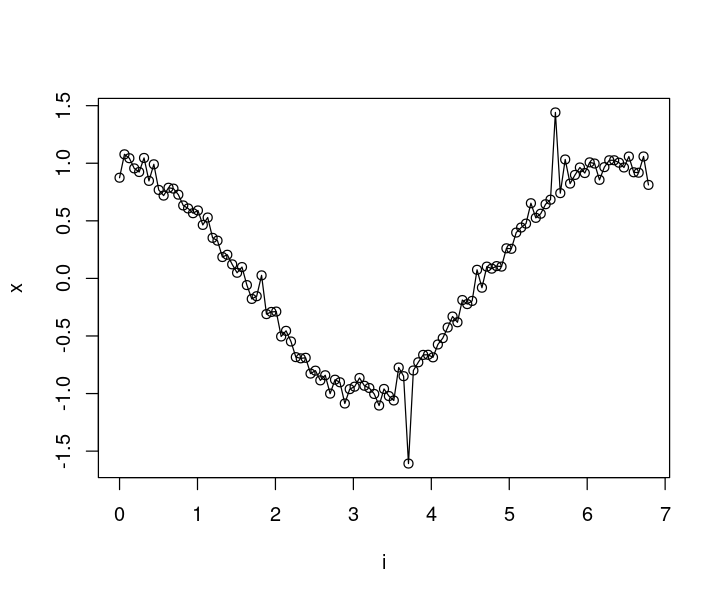

In [2]:
i <- seq(0, 2*pi+8*pi/50, pi/50)
x <- cos(i)
noise <- rnorm(length(x), 0, sd(x)/10)

x <- x + noise
x[30] <-rnorm(1, 0, sd(x))

x[60] <-rnorm(1, 0, sd(x))

x[90] <-rnorm(1, 0, sd(x))


options(repr.plot.width=6, repr.plot.height=5)  
par(mfrow = c(1, 1))
plot(i, x)
lines(i, x)

### sliding windows

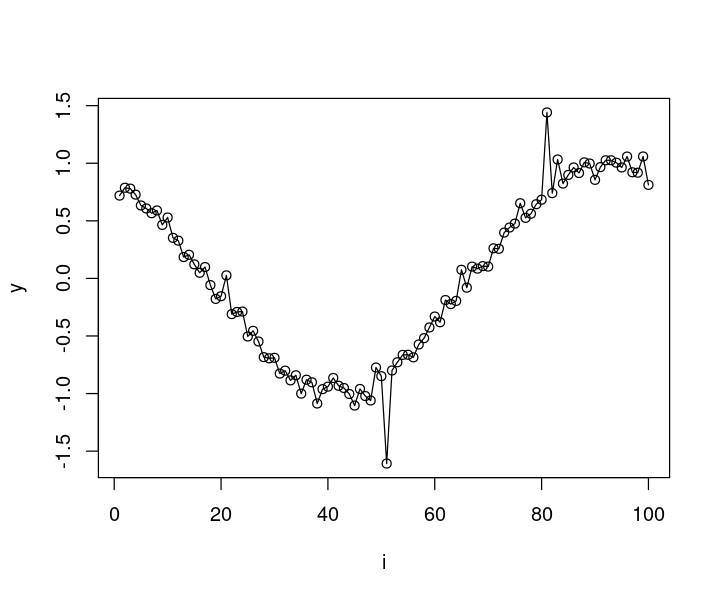

In [3]:
sw_size <- 10
xw <- ts_data(x, sw_size)
i <- 1:nrow(xw)
y <- xw[,sw_size]

plot(i, y)
lines(i, y)

### awareness

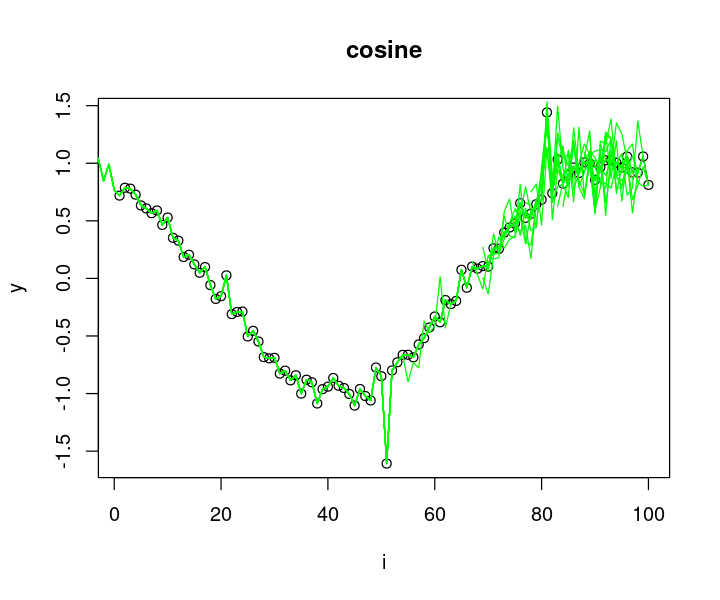

In [4]:
filter <- tsaug_awareness(0.25)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}

### smooth awareness

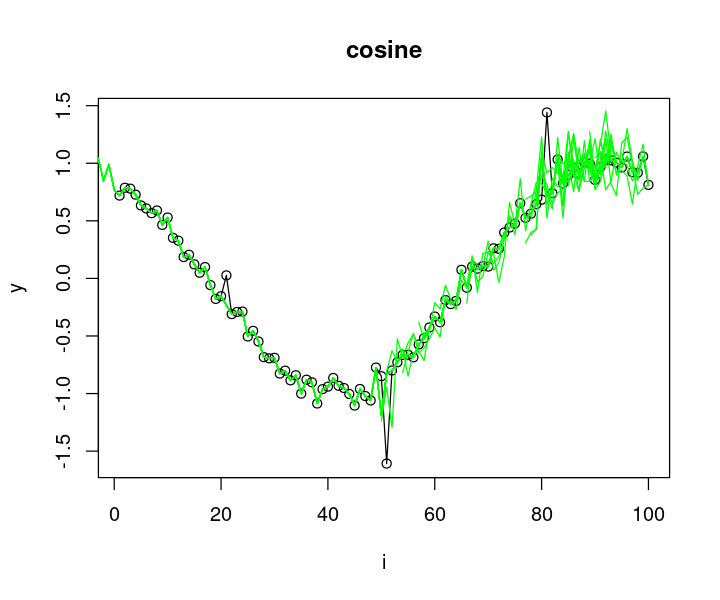

In [5]:
filter <- tsaug_aware_smooth(0.25)
xa <- transform(filter, xw)
idx <- attr(xa, "idx")

plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}